In [1]:
import tensorflow as tf
import numpy as np

In [2]:
corpus_raw = "He is the king . The king is royal . She is the royal queen"

In [3]:
raw_sentence = corpus_raw.split(".")
sentences = []
for sentence in raw_sentence:
    sentences.append(sentence.strip().split())

sentences

[['He', 'is', 'the', 'king'],
 ['The', 'king', 'is', 'royal'],
 ['She', 'is', 'the', 'royal', 'queen']]

In [4]:
data = []
window_size = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence): # word_index : 1, word: is
        start_index = max(word_index - window_size, 0) # 0
        end_index = min(word_index + window_size + 1, len(sentence)) # 4
       
        for nb_word in sentence[start_index : word_index]: #0:1  / sentence[0 : 1]
            data.append([word, nb_word])
            
        for nb_word in sentence[word_index + 1 : end_index]: #2:4   sentence[2 : 4] 2,3
            data.append([word, nb_word])
            
data

[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [5]:
words = []
for word in corpus_raw.split():
    if word != ".":
        words.append(word)
words = set(words)

word2int = {}
int2word = {}
vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i # He : 0
    int2word[i] = word 

print(word2int)
print(int2word)

{'king': 0, 'He': 1, 'She': 2, 'the': 3, 'royal': 4, 'The': 5, 'queen': 6, 'is': 7}
{0: 'king', 1: 'He', 2: 'She', 3: 'the', 4: 'royal', 5: 'The', 6: 'queen', 7: 'is'}


In [6]:
def to_one_hot (word_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[word_index] = 1
    return temp

In [7]:
x_train = []
y_train = []
for word in data:
    x_train.append(to_one_hot(word2int[word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[word[1]], vocab_size))


In [8]:
x_train[:3]

[array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.])]

In [9]:
x_train = np.asarray(x_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)

x_train

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 

In [10]:
class Word2Vec :
    def __init__(self, vocab_size=10, embedding_dim = 5, optimizer='sgd', epochs =1000, learning_rate=0.01):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        if optimizer == 'adam':
            self.optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        else : 
            self.optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
        self.epochs = epochs
        self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim]))
        self.b1 = tf.Variable(tf.random.normal([self.embedding_dim]))
        
        self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
        self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))
    
    def vectorized (self, word_index):
        return (self.W1 + self.b1)[word_index]
    
    def train(self, x_train, y_train):
        for i in range(self.epochs):
            with tf.GradientTape() as tape:
                hidden_layer = tf.add(tf.matmul(x_train, self.W1), self.b1)
                output_layer = tf.add(tf.matmul(hidden_layer, self.W2), self.b2)
                
                pred = tf.nn.softmax(output_layer)
                loss = tf.reduce_mean(-tf.math.reduce_sum(y_train*tf.math.log(pred), axis=[1]))   
                
                grads = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
                self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2]))
                
            if i % 1000 == 0:
                print(loss)

In [11]:
w2v = Word2Vec(vocab_size = vocab_size, embedding_dim = 5, optimizer='adam', epochs=10000, learning_rate = 0.1)

In [12]:
w2v.train(x_train, y_train)

tf.Tensor(3.311716, shape=(), dtype=float32)
tf.Tensor(1.3742491, shape=(), dtype=float32)
tf.Tensor(1.374136, shape=(), dtype=float32)
tf.Tensor(1.3741217, shape=(), dtype=float32)
tf.Tensor(1.3741585, shape=(), dtype=float32)
tf.Tensor(1.3741715, shape=(), dtype=float32)
tf.Tensor(1.3747172, shape=(), dtype=float32)
tf.Tensor(1.3742597, shape=(), dtype=float32)
tf.Tensor(1.3740953, shape=(), dtype=float32)
tf.Tensor(1.3741038, shape=(), dtype=float32)


In [13]:
word2int

{'king': 0,
 'He': 1,
 'She': 2,
 'the': 3,
 'royal': 4,
 'The': 5,
 'queen': 6,
 'is': 7}

In [43]:
w2v.vectorized(word2int['queen']).numpy()

array([ 1.1407413 ,  1.011859  ,  0.50913876, -1.3706946 ,  2.9040105 ],
      dtype=float32)

In [44]:
w2v.vectorized(word2int['king']).numpy()

array([-0.26924902,  0.2889631 ,  2.3547173 , -0.11784643,  3.2413383 ],
      dtype=float32)

In [48]:
vector = w2v.W1 + w2v.b1
vector

<tf.Tensor: shape=(8, 5), dtype=float32, numpy=
array([[ 1.9103556 , -0.04284583,  1.0499043 ,  1.6153147 ,  2.0497057 ],
       [ 1.7611601 ,  0.36576256,  0.14340125,  1.9065623 ,  1.699919  ],
       [ 0.82636714, -1.4330837 , -0.4114942 , -2.2344108 ,  1.6519203 ],
       [ 0.03134391, -1.6701368 , -1.6196985 ,  2.089708  ,  1.0316317 ],
       [ 1.1562252 , -1.5359254 ,  2.638041  ,  1.0765315 ,  0.25160563],
       [ 0.2958536 ,  0.75135255,  0.3960601 , -0.12115985, -1.8323201 ],
       [ 1.1407413 ,  1.011859  ,  0.50913876, -1.3706946 ,  2.9040105 ],
       [-0.26924902,  0.2889631 ,  2.3547173 , -0.11784643,  3.2413383 ]],
      dtype=float32)>

In [46]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vector)

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors, "12")

queen [-0.9756935  -0.21913934]
royal [-0.24413551  0.9697411 ]


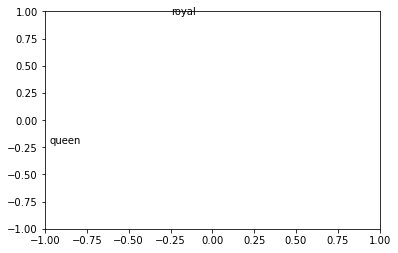

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom =-1, top=1)
for word in words:
    print(word, vectors[word2int[word]])
    ax.annotate(word, (vectors[word2int[word]][0], vectors[word2int[word]][1]))

plt.show()